In [81]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

#importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing libraries for data split model building 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

# importing library to scale the values
from sklearn.preprocessing import StandardScaler


#importing libraries for model evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import f1_score

#importing libraries for ROC-AUC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [66]:
df = pd.read_csv('Predict_Loan_Approval_new.csv',index_col = 0)

In [67]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,total_income,Loan_Amount_Term_Years
0,Male,Yes,1,Graduate,No,128,1,Rural,N,6091.0,30.0
1,Male,Yes,0,Graduate,Yes,66,1,Urban,Y,3000.0,30.0
2,Male,Yes,0,Not Graduate,No,120,1,Urban,Y,4941.0,30.0
3,Male,No,0,Graduate,No,141,1,Urban,Y,6000.0,30.0
4,Male,Yes,2,Graduate,Yes,267,1,Urban,Y,9613.0,30.0


In [68]:
df = df[df['total_income'] < 25000]

In [69]:
df.isnull().sum().sum()

0

In [70]:
# splitting the dataframe
X = df.loc[:,df.columns != 'Loan_Status'] 
y = df.loc[:,df.columns == 'Loan_Status']

In [71]:
#creating dummies of the data set
X = pd.get_dummies(X,drop_first=True)
# X.head()
y = pd.get_dummies(y,drop_first=True)
# y.head()

#### model building

In [72]:
sscaler = StandardScaler() #initializing the scaler function

In [73]:
scaled_data = sscaler.fit_transform(X) #fitting and trasforming the data in to common scale
X_new = pd.DataFrame(scaled_data,columns = X.columns) # creating a dataframe using 
                                                      #the scaled values and original data frame column names

In [74]:
X_new.head()

,Dependents,LoanAmount,Credit_History,total_income,Loan_Amount_Term_Years,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.226650,-0.196998,0.409253,-0.099243,0.273365,0.470797,0.737546,-0.507242,-0.398653,-0.807198,-0.677098
1,-0.758967,-0.998960,0.409253,-0.932559,0.273365,0.470797,0.737546,-0.507242,2.508447,-0.807198,1.476891
2,-0.758967,-0.300477,0.409253,-0.409276,0.273365,0.470797,0.737546,1.971446,-0.398653,-0.807198,1.476891
3,-0.758967,-0.028844,0.409253,-0.123776,0.273365,0.470797,-1.355848,-0.507242,-0.398653,-0.807198,1.476891
4,1.212268,1.600951,0.409253,0.850269,0.273365,0.470797,0.737546,-0.507242,2.508447,-0.807198,1.476891


In [104]:
#splitting the dataset into train and split 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=3300)

In [105]:
random_forest = RandomForestClassifier()
random_forest = random_forest.fit(X_train.values,y_train.values.ravel())
y_pred = random_forest.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred)

0.9052631578947369

In [107]:
confusion_matrix(y_test,y_pred)

array([[18,  6],
       [ 3, 68]], dtype=int64)

In [108]:
print(classification_report(y_test,y_pred),'\n')

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.92      0.96      0.94        71

    accuracy                           0.91        95
   macro avg       0.89      0.85      0.87        95
weighted avg       0.90      0.91      0.90        95
 



In [109]:
roc_auc_score(y_test,y_pred)

0.8538732394366196

In [110]:
f1_score(y_test,y_pred)

0.9379310344827587

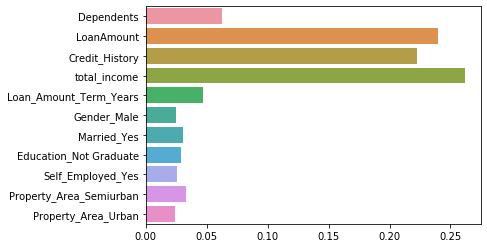

In [111]:
sns.barplot(random_forest.feature_importances_,X_new.columns)

In [113]:
X_ls = X_new[['LoanAmount', 'Credit_History', 'total_income',
       'Loan_Amount_Term_Years','Property_Area_Urban','Dependents']]

In [114]:
#splitting the dataset into train and split 
X_train, X_test, y_train, y_test = train_test_split(X_ls, y, test_size=0.20, random_state=3300)

In [115]:
random_forest_1 = RandomForestClassifier()
random_forest_1 = random_forest_1.fit(X_train.values,y_train.values.ravel())
y_pred = random_forest_1.predict(X_test)

In [116]:
accuracy_score(y_test,y_pred)

0.8631578947368421

In [117]:
confusion_matrix(y_test,y_pred)

array([[17,  7],
       [ 6, 65]], dtype=int64)

In [118]:
print(classification_report(y_test,y_pred),'\n')

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        24
           1       0.90      0.92      0.91        71

    accuracy                           0.86        95
   macro avg       0.82      0.81      0.82        95
weighted avg       0.86      0.86      0.86        95
 



In [119]:
roc_auc_score(y_test,y_pred)

0.8119131455399061

In [120]:
f1_score(y_test,y_pred)

0.9090909090909091

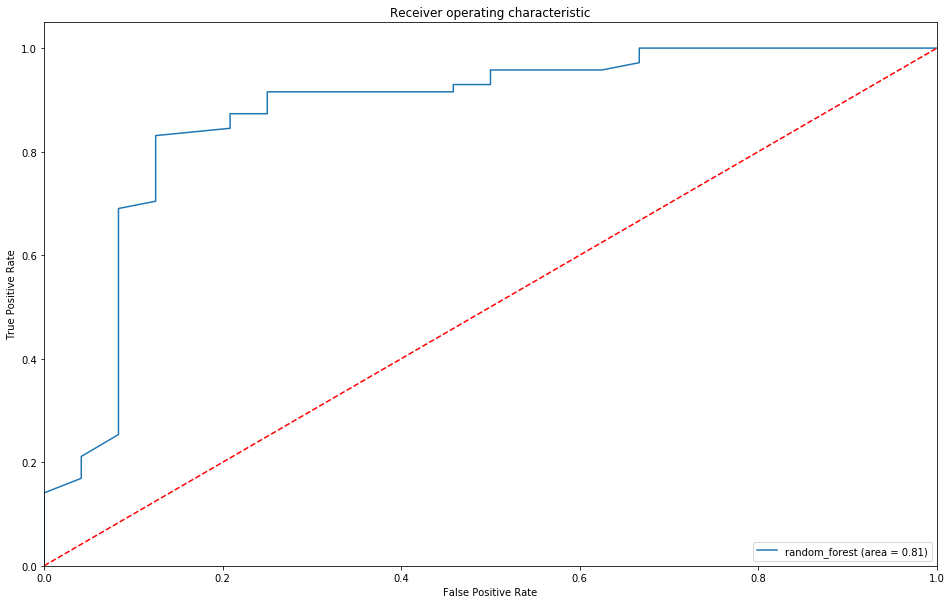

In [121]:
random_forest_g = roc_auc_score(y_test, random_forest_1.predict(X_test))
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, random_forest_1.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,10))
plt.plot(fpr_log, tpr_log, label='random_forest (area = %0.2f)' % random_forest_g)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

## RandomSearch CV Model

In [122]:
df = pd.read_csv('Predict_Loan_Approval_new.csv',index_col = 0)
df = df[df['total_income'] < 25000]
# splitting the dataframe
X = df.loc[:,df.columns != 'Loan_Status'] 
y = df.loc[:,df.columns == 'Loan_Status']

In [123]:
#creating dummies of the data set
X = pd.get_dummies(X,drop_first=True)
# X.head()
y = pd.get_dummies(y,drop_first=True)
# y.head()

In [124]:
sscaler = StandardScaler() #initializing the scaler function
scaled_data = sscaler.fit_transform(X) #fitting and trasforming the data in to common scale
scaled_df = pd.DataFrame(scaled_data,columns = X.columns) # creating a dataframe using 
                                                      #the scaled values and original data frame column names

In [125]:
scaled_df.head()

,Dependents,LoanAmount,Credit_History,total_income,Loan_Amount_Term_Years,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.226650,-0.196998,0.409253,-0.099243,0.273365,0.470797,0.737546,-0.507242,-0.398653,-0.807198,-0.677098
1,-0.758967,-0.998960,0.409253,-0.932559,0.273365,0.470797,0.737546,-0.507242,2.508447,-0.807198,1.476891
2,-0.758967,-0.300477,0.409253,-0.409276,0.273365,0.470797,0.737546,1.971446,-0.398653,-0.807198,1.476891
3,-0.758967,-0.028844,0.409253,-0.123776,0.273365,0.470797,-1.355848,-0.507242,-0.398653,-0.807198,1.476891
4,1.212268,1.600951,0.409253,0.850269,0.273365,0.470797,0.737546,-0.507242,2.508447,-0.807198,1.476891


In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
n_estimators = [i for i in range(100,1000,10)]
criterion = ['gini','entropy']
max_depth = [i for i in range(1,20,1)]
max_depth.append(None)
min_samples_split = [i for i in range(2,10,2)]
min_samples_leaf = [i for i in range(1,100,1)]
max_features = [2,3,4,'auto','sqrt','log2',None]
random_state = [i for i in range(0,1000,100)]
max_samples = [2,3,4,5,6]

In [193]:
max_samples

[2, 3, 4, 5, 6]

In [194]:
Random_Forest_model = RandomForestClassifier()

In [195]:
params = {'n_estimators' : n_estimators,
         'criterion': criterion, 'max_depth': max_depth,
         'min_samples_split' :min_samples_split ,
         'min_samples_leaf' :min_samples_leaf,
         'max_features' :max_features,
         'random_state'  : random_state,
         'max_samples' : max_samples}

In [196]:
print(params)

{'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91

In [197]:
random_search_forest = RandomizedSearchCV(Random_Forest_model, param_distributions = params , cv =10 ,verbose = 12,scoring ='roc_auc' )

In [198]:
random_search_forest.fit(scaled_df.values, y.values.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.9s
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.7s
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.7s
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s remaining:    0.0s


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.8s
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.1s remaining:    0.0s


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.8s
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.9s remaining:    0.0s


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.7s
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.6s remaining:    0.0s


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.8s
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.4s remaining:    0.0s


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.7s
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.2s remaining:    0.0s


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.7s
[CV] random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.9s remaining:    0.0s


[CV]  random_state=500, n_estimators=680, min_samples_split=8, min_samples_leaf=64, max_samples=6, max_features=log2, max_depth=11, criterion=entropy, score=0.500, total=   1.8s
[CV] random_state=600, n_estimators=610, min_samples_split=6, min_samples_leaf=71, max_samples=5, max_features=sqrt, max_depth=1, criterion=entropy 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.7s remaining:    0.0s


[CV]  random_state=600, n_estimators=610, min_samples_split=6, min_samples_leaf=71, max_samples=5, max_features=sqrt, max_depth=1, criterion=entropy, score=0.500, total=   1.6s
[CV] random_state=600, n_estimators=610, min_samples_split=6, min_samples_leaf=71, max_samples=5, max_features=sqrt, max_depth=1, criterion=entropy 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   19.3s remaining:    0.0s


[CV]  random_state=600, n_estimators=610, min_samples_split=6, min_samples_leaf=71, max_samples=5, max_features=sqrt, max_depth=1, criterion=entropy, score=0.500, total=   1.5s
[CV] random_state=600, n_estimators=610, min_samples_split=6, min_samples_leaf=71, max_samples=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  random_state=600, n_estimators=610, min_samples_split=6, min_samples_leaf=71, max_samples=5, max_features=sqrt, max_depth=1, criterion=entropy, score=0.500, total=   1.7s
[CV] random_state=600, n_estimators=610, min_samples_split=6, min_samples_leaf=71, max_samples=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  random_state=600, n_estimators=610, min_samples_split=6, min_samples_leaf=71, max_samples=5, max_features=sqrt, max_depth=1, criterion=entropy, score=0.500, total=   1.5s
[CV] random_state=600, n_estimators=610, min_samples_split=6, min_samples_leaf=71, max_samples=5, max_features=sqrt, max_depth=1, criterion=entropy 
[CV]  random_state=600

[CV]  random_state=700, n_estimators=140, min_samples_split=8, min_samples_leaf=87, max_samples=5, max_features=None, max_depth=8, criterion=gini, score=0.500, total=   0.4s
[CV] random_state=700, n_estimators=140, min_samples_split=8, min_samples_leaf=87, max_samples=5, max_features=None, max_depth=8, criterion=gini 
[CV]  random_state=700, n_estimators=140, min_samples_split=8, min_samples_leaf=87, max_samples=5, max_features=None, max_depth=8, criterion=gini, score=0.500, total=   0.3s
[CV] random_state=700, n_estimators=140, min_samples_split=8, min_samples_leaf=87, max_samples=5, max_features=None, max_depth=8, criterion=gini 
[CV]  random_state=700, n_estimators=140, min_samples_split=8, min_samples_leaf=87, max_samples=5, max_features=None, max_depth=8, criterion=gini, score=0.500, total=   0.3s
[CV] random_state=100, n_estimators=470, min_samples_split=8, min_samples_leaf=48, max_samples=5, max_features=None, max_depth=15, criterion=entropy 
[CV]  random_state=100, n_estimators

[CV]  random_state=300, n_estimators=400, min_samples_split=4, min_samples_leaf=84, max_samples=5, max_features=2, max_depth=8, criterion=entropy, score=0.500, total=   1.0s
[CV] random_state=300, n_estimators=400, min_samples_split=4, min_samples_leaf=84, max_samples=5, max_features=2, max_depth=8, criterion=entropy 
[CV]  random_state=300, n_estimators=400, min_samples_split=4, min_samples_leaf=84, max_samples=5, max_features=2, max_depth=8, criterion=entropy, score=0.500, total=   1.0s
[CV] random_state=300, n_estimators=400, min_samples_split=4, min_samples_leaf=84, max_samples=5, max_features=2, max_depth=8, criterion=entropy 
[CV]  random_state=300, n_estimators=400, min_samples_split=4, min_samples_leaf=84, max_samples=5, max_features=2, max_depth=8, criterion=entropy, score=0.500, total=   1.0s
[CV] random_state=300, n_estimators=400, min_samples_split=4, min_samples_leaf=84, max_samples=5, max_features=2, max_depth=8, criterion=entropy 
[CV]  random_state=300, n_estimators=400

[CV]  random_state=500, n_estimators=550, min_samples_split=6, min_samples_leaf=37, max_samples=5, max_features=2, max_depth=14, criterion=gini, score=0.500, total=   1.3s
[CV] random_state=100, n_estimators=300, min_samples_split=4, min_samples_leaf=9, max_samples=2, max_features=2, max_depth=13, criterion=gini 
[CV]  random_state=100, n_estimators=300, min_samples_split=4, min_samples_leaf=9, max_samples=2, max_features=2, max_depth=13, criterion=gini, score=0.500, total=   0.9s
[CV] random_state=100, n_estimators=300, min_samples_split=4, min_samples_leaf=9, max_samples=2, max_features=2, max_depth=13, criterion=gini 
[CV]  random_state=100, n_estimators=300, min_samples_split=4, min_samples_leaf=9, max_samples=2, max_features=2, max_depth=13, criterion=gini, score=0.500, total=   0.8s
[CV] random_state=100, n_estimators=300, min_samples_split=4, min_samples_leaf=9, max_samples=2, max_features=2, max_depth=13, criterion=gini 
[CV]  random_state=100, n_estimators=300, min_samples_spl

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, None],
                                        'max_features': [2, 3, 4, 'auto',
                                                         'sqrt', 'log2', None],
                                        'max_samples': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
  

In [199]:
random_search_forest.best_params_

{'random_state': 500,
 'n_estimators': 680,
 'min_samples_split': 8,
 'min_samples_leaf': 64,
 'max_samples': 6,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

In [210]:
r_forest = RandomForestClassifier(random_state = 500,
                                 n_estimators = 500,
                                 min_samples_split = 8,
                                 min_samples_leaf = 64,
                                 max_samples = 6,
                                 max_features = 'log2',
                                 max_depth = 11,
                                 criterion = 'entropy')

In [211]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.20, random_state=500)

In [212]:
Random_Forest_model = r_forest.fit(X_train.values,y_train.values.ravel())
y_pred = Random_Forest_model.predict(X_test)

In [213]:
y_test.values.ravel()

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [214]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [215]:
accuracy_score(y_test,y_pred)

0.7263157894736842

In [216]:
confusion_matrix(y_test,y_pred)

array([[ 0, 26],
       [ 0, 69]], dtype=int64)

In [190]:
from sklearn.metrics import recall_score

In [191]:
recall_score(y_test,y_pred)

1.0